In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl



autumn_cmap = mpl.cm.get_cmap("YlOrRd", 8) 
a_colours = autumn_cmap(np.arange(8))[1:]


%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:

def format_figure(ax):
    '''Standard format to apply to all plots'''
    sizer = 14
    title_size = 18#sizer * 1.5
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(sizer)
    for item in [ax.title, ax.xaxis.label, ax.yaxis.label]:
        item.set_fontsize(title_size)    
    
    plt.setp(ax.spines.values(), linewidth=2)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    
    return ax

def format_legend(legend):
    for label in legend.get_texts():
        label.set_fontsize(14)

    for label in legend.get_lines():
        label.set_linewidth(2)  # the legend line width
        
    return legend
        


sns.set_style("ticks")

#1. A quick look at the data, timecourse

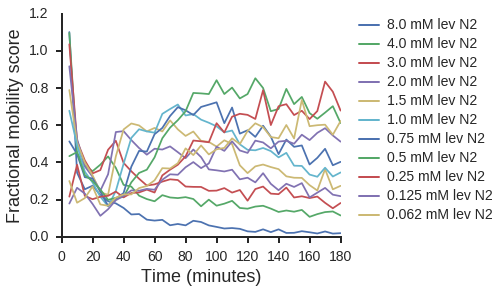

In [34]:
data = np.load('./example_levamisole_data.npy')

# Normalise to the mean of the 8 no-drug control wells, stepwise by time:
N2_lev_norm = data[:,:,:]/data[:,11,:].mean(axis=0)

# setup a list of timepoints from 5 minutes to 180 minutes in increments of 5:
times = range(5,185,5)[:36]

# dfine levamisole concentrations used
lev_concs = [8.0, 4.0, 3.0, 2.0, 1.5, 1.0, 0.75, 0.5, 0.25, 0.125, 0.062, 0]

# plot mean response of the eight wells for each concentration on single pair of axes:
ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=120)
for i in [0,1,2,3,4,5,6,7,8,9,10]:
    ax.plot(times, N2_lev_norm[:,i,:].mean(axis=0), 
            label = str(lev_concs[i]) + ' mM lev N2')
ax = format_figure(ax)
ax.set_xlim([0, 180])
ax.set_ylim([0, 1.2])
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
leg = format_legend(leg)
sns.despine()   
plt.show()



# 2. Timecourse, reduce clutter, use a sequential colour map

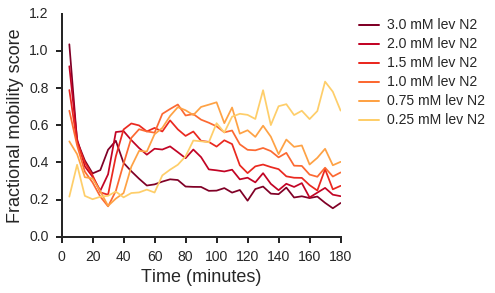

In [35]:
# plot all data on single pair of axes:
ax = plt.subplot(111, xlabel='Time (minutes)', ylabel='Fractional mobility score', aspect=120)
for j, i in enumerate([2,3,4,5,6,8]):
    ax.plot(times, N2_lev_norm[:,i,:].mean(axis=0), 
            label = str(lev_concs[i]) + ' mM lev N2', color = a_colours[-1-j])
ax = format_figure(ax)
ax.set_xlim([0, 180])
ax.set_ylim([0, 1.2])
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
leg = format_legend(leg)
sns.despine()   
plt.show()